In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
  
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
  
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 1. CNN (Convolutional Neural Network)
- 이미지 인식 분야에서 강력한 성능
- 입력된 이미지 - 특징 추출 위해 MASK(filter/kernel/window) 덮어씌우기
- 공간 영역 기반 처리 

### Blurring 
- 뽀샵 
- 영상을 밝게 수정하면서 약간 흐리게 처리하는 기법 

### Sharpening 

### Edge 
- 화소 값이 급격히 변하는 부분

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
# 32 = mask(kurnel) num
# (3,3) = kurnel row, column
# (row, column, color) 3=colors, 1=black/white
model.add(Conv2D(64, (3, 3), activation='relu')) # 다시 64개로 늘림

# 2. Pooling / Sub Sampling
- convolution 결과를 다시 한 번 축소 
### 1)Max Pooling - mask 적용후, 가장 큰 값 추출
### 2)Avg Pooling 

In [7]:
model.add(MaxPooling2D(pool_size=2))
# 2=half

# 3. DropOut / Flatten(25%)
- hidden layer node 중 일부를 임의로 꺼주는 것 (계산 X)
- 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지

In [8]:
model.add(Dropout(0.25))
model.add(Flatten()) # 2차원 => 1차원 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
# CNN.xlsx 참조

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
 
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05384, saving model to ./model\01-0.0538.hdf5

Epoch 00002: val_loss improved from 0.05384 to 0.04043, saving model to ./model\02-0.0404.hdf5

Epoch 00003: val_loss improved from 0.04043 to 0.03540, saving model to ./model\03-0.0354.hdf5

Epoch 00004: val_loss improved from 0.03540 to 0.03171, saving model to ./model\04-0.0317.hdf5

Epoch 00005: val_loss improved from 0.03171 to 0.03153, saving model to ./model\05-0.0315.hdf5

Epoch 00006: val_loss improved from 0.03153 to 0.03071, saving model to ./model\06-0.0307.hdf5

Epoch 00007: val_loss improved from 0.03071 to 0.02924, saving model to ./model\07-0.0292.hdf5

Epoch 00008: val_loss did not improve from 0.02924

Epoch 00009: val_loss improved from 0.02924 to 0.02898, saving model to ./model\09-0.0290.hdf5

Epoch 00010: val_loss did not improve from 0.02898

Epoch 00011: val_loss did not improve from 0.02898

Epoch 00012: val_loss improved from 0.02898 to 0.02709, saving model to ./model

In [13]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0263 - accuracy: 0.9940

 Test Accuracy: 0.9940


In [ ]:
# 99.4% 정확도 

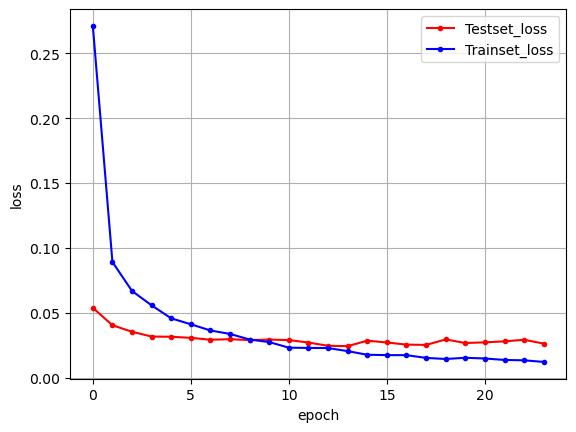

In [14]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']
  
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
  
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()